In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

                                                                                                                
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Instagram,Facebook,Twitter,Linkedin,Discord,Twitch,Ingresos
0,11.257702,2.943174,6.803809,15.873606,5.545977,21.238601,269.800741
1,9.304230,2.709958,5.095496,13.467107,5.900347,18.869122,86.752487
2,NaN,4.936659,6.173092,14.461141,6.763816,22.107658,348.569975
3,9.423370,4.507282,7.762059,15.635129,7.707726,19.378033,415.976620
4,NaN,5.258533,5.760111,13.585080,6.574550,22.045628,346.167361


In [3]:
# Estadísticos
df.describe()
df.describe(include='all')

# Tipos de los datos
df.dtypes

# Tipos de los datos y missings
df.info()

# Columnas del dataset
df.columns

# dimensiones del dataset
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Instagram  1985 non-null   float64
 1   Facebook   1971 non-null   float64
 2   Twitter    1956 non-null   float64
 3   Linkedin   1982 non-null   float64
 4   Discord    2000 non-null   float64
 5   Twitch     2010 non-null   float64
 6   Ingresos   2010 non-null   float64
dtypes: float64(7)
memory usage: 110.0 KB
Filas: 2010
Columnas: 7


In [4]:
df.describe()

,Instagram,Facebook,Twitter,Linkedin,Discord,Twitch,Ingresos
count,1985.000000,1971.000000,1956.000000,1982.000000,2000.000000,2010.000000,2010.000000
mean,9.971020,4.075464,6.706138,14.960127,7.033877,20.973706,316.573369
std,1.000713,1.012235,1.009279,0.981687,1.018381,0.994449,104.069490
min,6.796837,0.572794,2.673021,11.290172,3.387479,17.660218,-46.952791
25%,9.325907,3.397380,5.986793,14.304720,6.354149,20.308463,244.088089
50%,9.961637,4.074588,6.717924,14.958475,7.056824,20.970154,316.368632
75%,10.608849,4.745205,7.408070,15.648404,7.737820,21.629410,387.564328
max,13.492470,7.205183,10.001590,18.670235,10.682078,24.323364,652.044392


In [4]:
df[df['Ingresos'] < 0]

,Instagram,Facebook,Twitter,Linkedin,Discord,Twitch,Ingresos
1535,11.110667,1.318129,4.082513,15.436595,7.900656,19.937903,-46.952791


In [5]:
df.drop(1535 ,axis = 0, inplace = True)

In [6]:
df[df['Ingresos'] < 0]

,Instagram,Facebook,Twitter,Linkedin,Discord,Twitch,Ingresos


In [7]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS and his cardinality
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)


    return concatenado.T

In [8]:
data_report(df)

COL_N,Instagram,Facebook,Twitter,Linkedin,Discord,Twitch,Ingresos
DATA_TYPE,float64,float64,float64,float64,float64,float64,float64
MISSINGS (%),1.24,1.94,2.69,1.39,0.5,0.0,0.0
UNIQUE_VALUES,1984,1970,1955,1981,1999,2009,2009
CARDIN (%),98.76,98.06,97.31,98.61,99.5,100.0,100.0


In [9]:
# Imputacion mediante KNN
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
imputer.fit(df[['Twitch', 'Discord', 'Instagram','Facebook', 'Twitter', 'Linkedin']])
df[['Twitch', 'Discord', 'Instagram', 'Facebook', 'Twitter', 'Linkedin']] = imputer.transform(df[['Twitch', 'Discord', 'Instagram', 'Facebook', 'Twitter', 'Linkedin']])

In [10]:
data_report(df)

COL_N,Instagram,Facebook,Twitter,Linkedin,Discord,Twitch,Ingresos
DATA_TYPE,float64,float64,float64,float64,float64,float64,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,2009,2009,2009,2009,2009,2009,2009
CARDIN (%),100.0,100.0,100.0,100.0,100.0,100.0,100.0


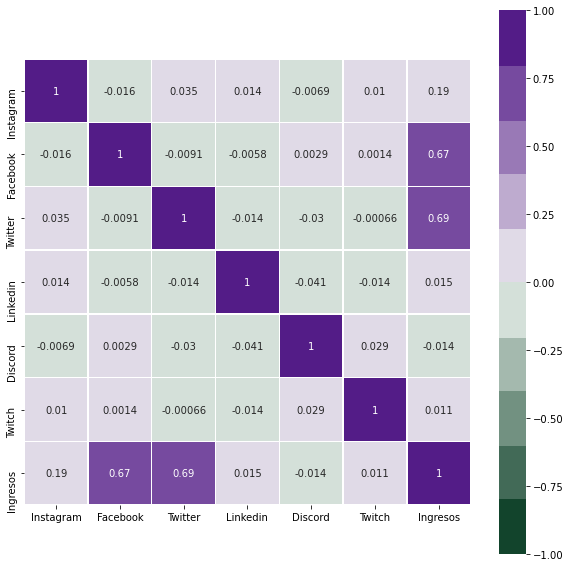

In [11]:
# Establece los límites de colores entre [-1, 1], así como un rango de colores de oscuro a oscuro, pasando por claro (0 correlación)
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

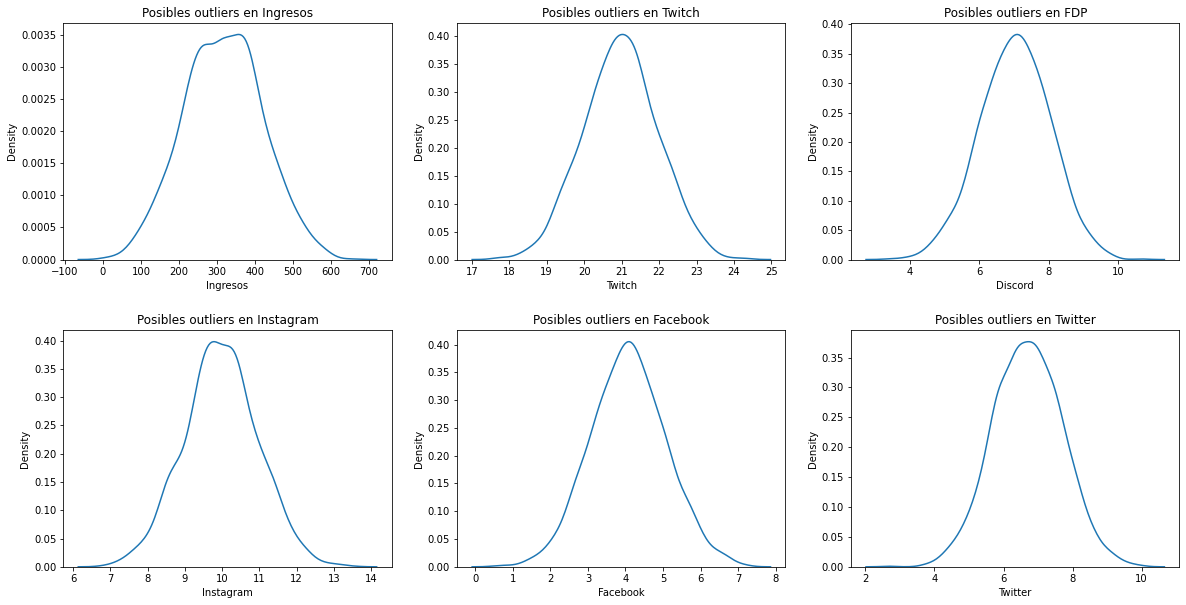

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(hspace = 0.3)

sns.kdeplot(df['Ingresos'], ax=axes[0, 0])
axes[0, 0].set_title("Posibles outliers en Ingresos")

sns.kdeplot(df['Twitch'], ax=axes[0, 1])
axes[0, 1].set_title("Posibles outliers en Twitch")

sns.kdeplot(df['Discord'], ax=axes[0, 2])
axes[0, 2].set_title("Posibles outliers en FDP")

sns.kdeplot(df['Instagram'], ax=axes[1, 0])
axes[1, 0].set_title("Posibles outliers en Instagram")

sns.kdeplot(df['Facebook'], ax=axes[1, 1])
axes[1, 1].set_title("Posibles outliers en Facebook")

sns.kdeplot(df['Twitter'], ax=axes[1, 2])
axes[1, 2].set_title("Posibles outliers en Twitter");

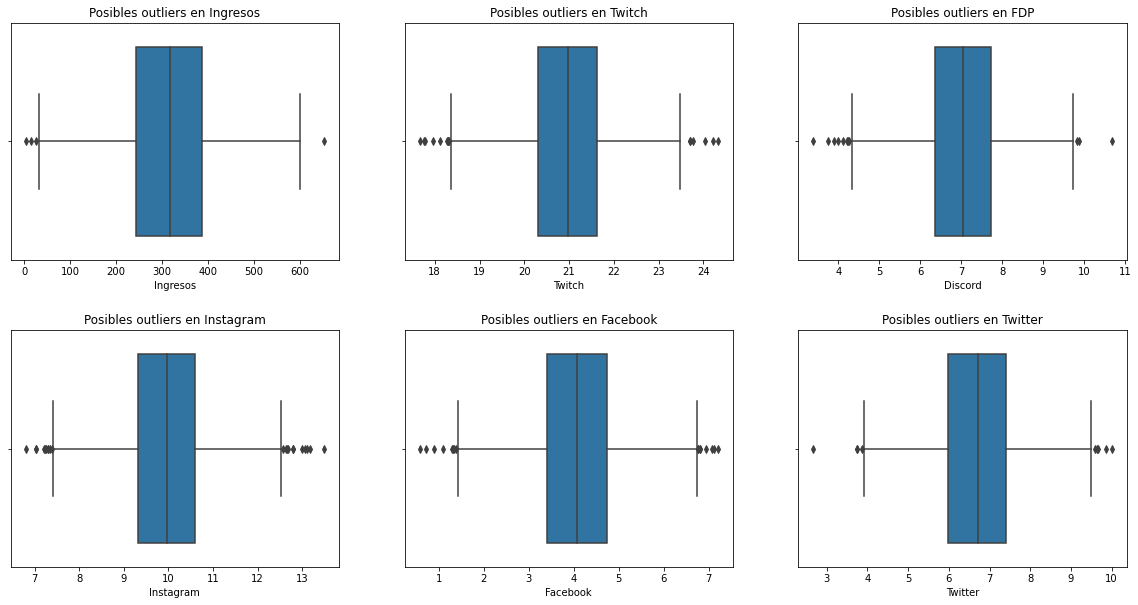

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(hspace = 0.3)

sns.boxplot(df['Ingresos'], ax=axes[0, 0])
axes[0, 0].set_title("Posibles outliers en Ingresos")

sns.boxplot(df['Twitch'], ax=axes[0, 1])
axes[0, 1].set_title("Posibles outliers en Twitch")

sns.boxplot(df['Discord'], ax=axes[0, 2])
axes[0, 2].set_title("Posibles outliers en FDP")

sns.boxplot(df['Instagram'], ax=axes[1, 0])
axes[1, 0].set_title("Posibles outliers en Instagram")

sns.boxplot(df['Facebook'], ax=axes[1, 1])
axes[1, 1].set_title("Posibles outliers en Facebook")

sns.boxplot(df['Twitter'], ax=axes[1, 2])
axes[1, 2].set_title("Posibles outliers en Twitter");

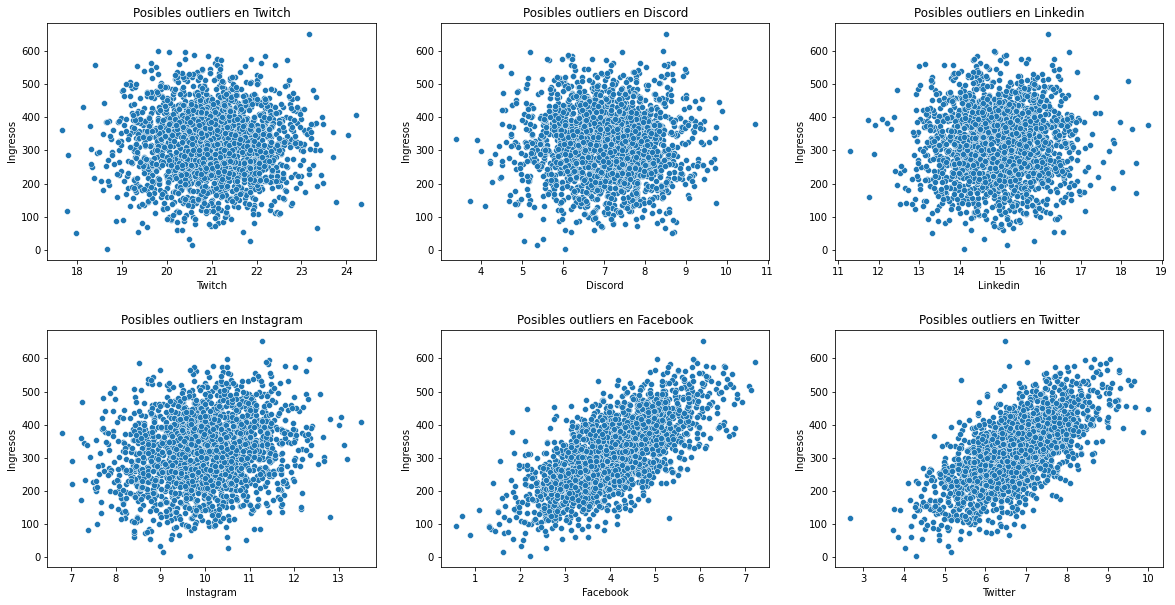

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(hspace = 0.3)

sns.scatterplot(data=df, x='Twitch', y='Ingresos', ax=axes[0, 0])
axes[0, 0].set_title("Posibles outliers en Twitch")

sns.scatterplot(data=df, x='Discord', y='Ingresos', ax=axes[0, 1])
axes[0, 1].set_title("Posibles outliers en Discord")

sns.scatterplot(data=df, x='Linkedin', y='Ingresos', ax=axes[0, 2])
axes[0, 2].set_title("Posibles outliers en Linkedin")

sns.scatterplot(data=df, x='Instagram', y='Ingresos', ax=axes[1, 0])
axes[1, 0].set_title("Posibles outliers en Instagram")

sns.scatterplot(data=df, x='Facebook', y='Ingresos', ax=axes[1, 1])
axes[1, 1].set_title("Posibles outliers en Facebook")

sns.scatterplot(data=df, x='Twitter', y='Ingresos', ax=axes[1, 2])
axes[1, 2].set_title("Posibles outliers en Twitter");


In [15]:
from sklearn.ensemble import RandomForestRegressor

X = df.loc[:,'Instagram':'Twitch']
Y = df["Ingresos"]
names =['Instagram',	'Facebook',	'Twitter',	'Linkedin',	'Discord',	'Twitch']
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X, Y)

scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)
pd.DataFrame(scores, columns=['Score', 'Feature'])

,Score,Feature
0,0.5039,Twitter
1,0.4487,Facebook
2,0.0294,Instagram
3,0.0065,Discord
4,0.0058,Twitch
5,0.0058,Linkedin


In [16]:
X = df.loc[:,'Instagram':'Twitch']
y = df["Ingresos"]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X))



MinMaxScaler()


In [22]:
scaler.transform(X_train)

array([[0.7315438 , 0.60963128, 0.36070387, 0.54579709, 0.50519598,
        0.22953752],
       [0.18954557, 0.63392285, 0.33749612, 0.27864196, 0.53839455,
        0.60822823],
       [0.62620592, 0.80551722, 0.52428718, 0.48291975, 0.45862449,
        0.48327014],
       ...,
       [0.3788641 , 0.38299966, 0.32645151, 0.57061932, 0.53673635,
        0.63885285],
       [0.64735163, 0.59502062, 0.50841815, 0.53781205, 0.33423614,
        0.47179092],
       [0.15499891, 0.80564046, 0.48060323, 0.72321989, 0.61012156,
        0.67019208]])

ValueError: X has 1 features, but MinMaxScaler is expecting 6 features as input.

In [26]:
from sklearn.linear_model import LinearRegression


lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
predictions = lm.predict(X_test)

In [28]:
from sklearn import metrics

lm.score(X_test, y_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.48496732161479
MSE: 310.5868210251657
RMSE: 17.623473580005893


In [34]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_train, y_train)

LinearSVR(epsilon=1.5, random_state=42)

In [35]:
prediction_svm = svm_reg.predict(X_test)

In [37]:
svm_reg.score(X_test, y_test)
print('MAE:', metrics.mean_absolute_error(y_test, prediction_svm))
print('MSE:', metrics.mean_squared_error(y_test, prediction_svm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_svm)))

MAE: 19.166166923765893
MSE: 779.1551959538695
RMSE: 27.91335157149477


In [ ]:
from sklearn.preprocessing import StandardScaler
